#**Clustering Assignment**

**Theoretical Assignment**

Q.1 What is unsupervised learning in the context of machine learning?

→ Unsupervised learning is a type of machine learning where the model is trained on unlabeled data. The algorithm tries to discover hidden patterns, structures, or groupings in the data without predefined output labels. Clustering is one of the most common unsupervised techniques.

Q.2 How does K-Means clustering algorithm work?

→ K-Means clustering algorithm works as:
- Choose number of clusters K.
- Initialize K centroids randomly (or using K-Means++).
- Assign each point to the nearest centroid (cluster assignment).
- Recalculate centroids as the mean of assigned points.
- Repeat assignment & update until centroids stabilize or max iterations reached.

Q.3 Explain the concept of a dendrogram in hierarchical clustering.

→ A dendrogram is a tree-like diagram that shows how clusters are merged or split in hierarchical clustering. The vertical axis represents distance (or dissimilarity) & horizontal branches represent data points. Cutting the dendrogram at a certain level determines the final number of clusters.

Q.4 What is the main difference between K-Means & Hierarchical Clustering?

→ The main difference between K-Means & Hierarchical Clustering is as follows:
- **K-Means**: Partition-based, requires pre-defined K, efficient for large datasets.
- **Hierarchical**: Builds a tree of clusters, no need to specify K beforehand, but computationally expensive for large datasets.

Q.5 What are the advantages of DBSCAN over K-Means?

→ The advantages of DBSCAN over K-Means are as follows:
- Can find arbitrarily shaped clusters.
- Doesn't require specifying number of clusters in advance.
- Can detect noise & outliers.

Q.6 When would you use Silhouette Score in clustering?

→ Silhouette Score is used to evaluate cluster quality. It measures how similar a data point is to its own cluster vs. other clusters. It's helpful to determine the best number of clusters (higher is better).

Q.7 What are the limitations of Hierarchical Clustering?

→ The limitations of Hierarchical Clustering are:
- High computational cost for large datasets.
- Sensitive to noise & outliers.
- Once a merge/split is made, it cannot be undone.

Q.8 Why is feature scaling important in clustering algorithms like K-Means?

→ A feature scaling is important in clustering algorithms, because K-Means uses distance metrics (like Euclidean distance). Features with larger scales dominate clustering results if not normalized. Scaling ensures all features contribute equally.

Q.9 How does DBSCAN identify noise points?

→ Points that do not have enough neighbors within a given radius (eps) & are not part of any dense cluster are marked as noise (outliers).

Q.10 Define inertia in the context of K-Means.

→ Inertia measures how tightly data points are clustered around centroids. It is the sum of squared distances between each point & its assigned centroid. Lower inertia indicates better clustering.

Q.11 What is the elbow method in K-Means clustering?

→ A method to find the optimal number of clusters by plotting inertia vs. K. The “elbow point” (where inertia reduction slows down) indicates the best K.

Q.12 Describe the concept of "density" in DBSCAN.

→ Density is defined as the number of points within a specified radius (eps). A region is dense if it has at least min_samples points inside the radius.

Q.13 Can hierarchical clustering be used on categorical data?

→ Yes, but distance measures like Euclidean don't work directly. Instead, similarity measures (like Hamming distance) or encoding methods must be used.

Q.14 What does a negative Silhouette Score indicate?

→ It means the point is likely assigned to the wrong cluster because it is closer to another cluster than its own.

Q.15 Explain the term "linkage criteria" in hierarchical clustering.

→ Linkage criteria determine how distance between clusters is calculated:
- Single linkage - minimum distance between two clusters.
- Complete linkage - maximum distance.
- Average linkage - average distance.

Q.16 Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

→ K-Means clustering perform poorly on data with varying cluster sizes or densities, because K-Means assumes clusters are spherical & equal-sized. It struggles with irregular shapes, different densities & overlapping clusters.

Q.17 What are the core parameters in DBSCAN & how do they influence clustering?

→ The core parameters in DBSCAN are as given:
- eps: Radius of neighborhood.
- min_samples: Minimum points required to form a dense region.
They control cluster density & sensitivity to noise.

Q.18 How does K-Means++ improve upon standard K-Means initialization?

→ K-Means++ selects initial centroids more strategically (far apart) instead of random selection. This reduces chances of poor clustering & speeds up convergence.

Q.19 What is agglomerative clustering?

→ A bottom-up hierarchical approach where each point starts as its own cluster & clusters are iteratively merged until all points form one cluster.

Q.20 What makes Silhouette Score a better metric than just inertia for model evaluation?

→
- Inertia only measures compactness within clusters.
- Silhouette Score considers both compactness (intra-cluster) & separation (inter-cluster).

Thus, it gives a more reliable measure of clustering quality.

**Practical Questions**

Q.21 Generate synthetic data with 4 centers using make_blobs & apply K-Means clustering. Visualize using a scatter plot.

→

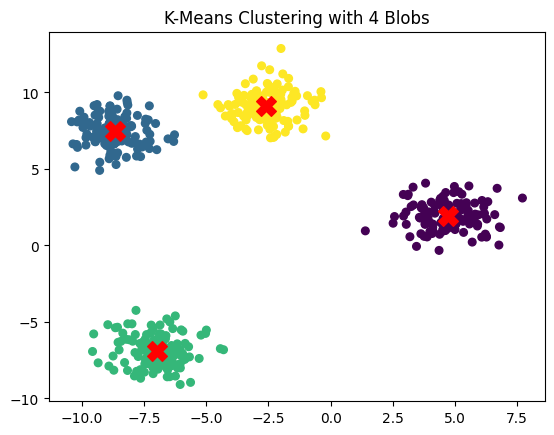

In [2]:
X, y = make_blobs(n_samples=500, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200)
plt.title("K-Means Clustering with 4 Blobs")
plt.show()

Q.22 Load the Iris dataset & use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

→

In [3]:
iris = load_iris()
X = iris.data
agg = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agg.fit_predict(X)
print("First 10 predicted labels:", labels[:10])

First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


Q.23 Generate synthetic data using make_moons & apply DBSCAN. Highlight outliers in the plot.

→

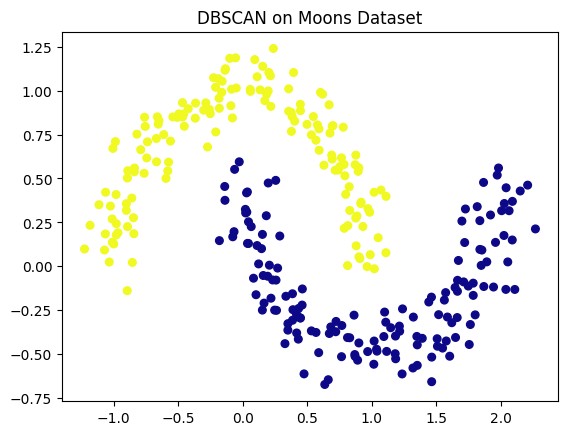

In [4]:
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="plasma", s=30)
plt.title("DBSCAN on Moons Dataset")
plt.show()

Q.24 Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.

→

In [5]:
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))

Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


Q.25 Use make_circles to generate synthetic data & cluster it using DBSCAN. Plot the result.

→

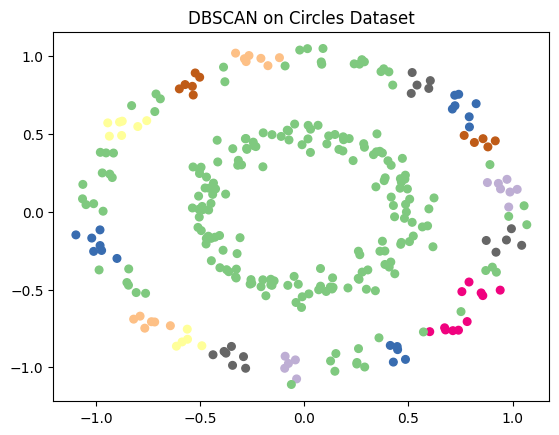

In [6]:
X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
dbscan = DBSCAN(eps=0.1, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="Accent", s=30)
plt.title("DBSCAN on Circles Dataset")
plt.show()

Q.26 Load the Breast Cancer dataset, apply MinMaxScaler & use K-Means with 2 clusters. Output the cluster centroids.

→

In [7]:
cancer = load_breast_cancer()
X = MinMaxScaler().fit_transform(cancer.data)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

print("Cluster centroids:\n", kmeans.cluster_centers_)

Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


Q.27 Generate synthetic data using make_blobs with varying cluster standard deviations & cluster with DBSCAN.

→

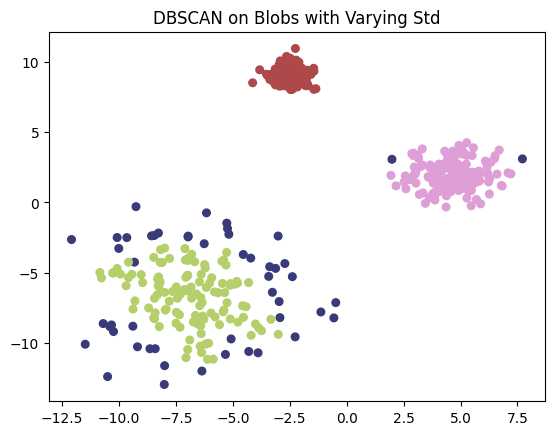

In [8]:
X, y = make_blobs(n_samples=500, centers=3, cluster_std=[0.5, 1.0, 2.5], random_state=42)
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="tab20b", s=30)
plt.title("DBSCAN on Blobs with Varying Std")
plt.show()

Q.28 Load the Digits dataset, reduce it to 2D using PCA & visualize clusters from K-Means.

→

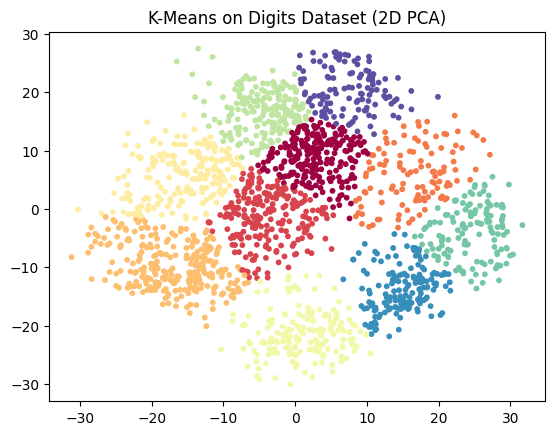

In [9]:
digits = load_digits()
X = PCA(2).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="Spectral", s=10)
plt.title("K-Means on Digits Dataset (2D PCA)")
plt.show()

Q.29  Create synthetic data using make_blobs & evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

→

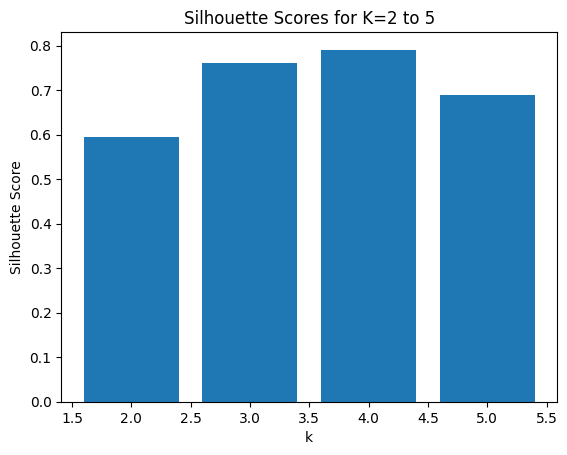

In [10]:
X, _ = make_blobs(n_samples=500, centers=4, random_state=42)
scores = {}
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    scores[k] = silhouette_score(X, kmeans.labels_)

plt.bar(scores.keys(), scores.values())
plt.title("Silhouette Scores for K=2 to 5")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

Q.30 Load the Iris dataset & use hierarchical clustering to group data. Plot a dendrogram with average linkage.

→

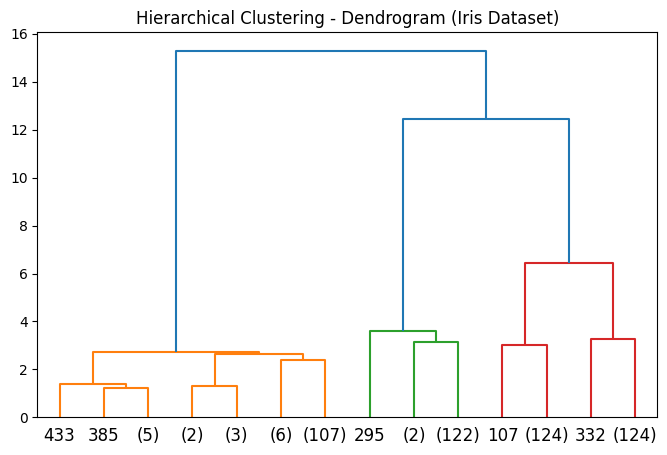

In [11]:
Z = linkage(X, method='average')
plt.figure(figsize=(8, 5))
dendrogram(Z, truncate_mode="level", p=3)
plt.title("Hierarchical Clustering - Dendrogram (Iris Dataset)")
plt.show()

Q.31 Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means & visualize with decision boundaries.

→

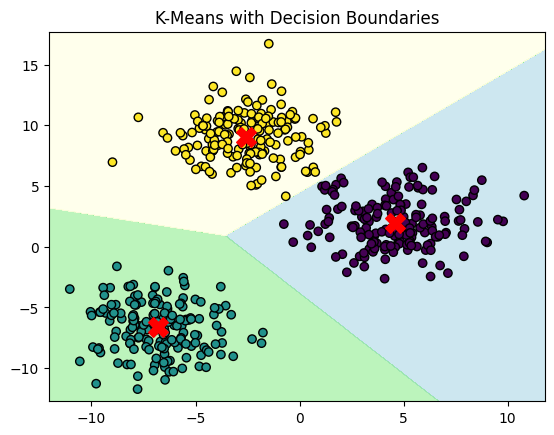

In [12]:
from matplotlib.colors import ListedColormap

X, y = make_blobs(n_samples=500, centers=3, cluster_std=2.0, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=ListedColormap(("lightblue", "lightgreen", "lightyellow")), alpha=0.6)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="viridis", edgecolors="k")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", c="red", s=200)
plt.title("K-Means with Decision Boundaries")
plt.show()

Q.32 Load the Digits dataset & apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

→

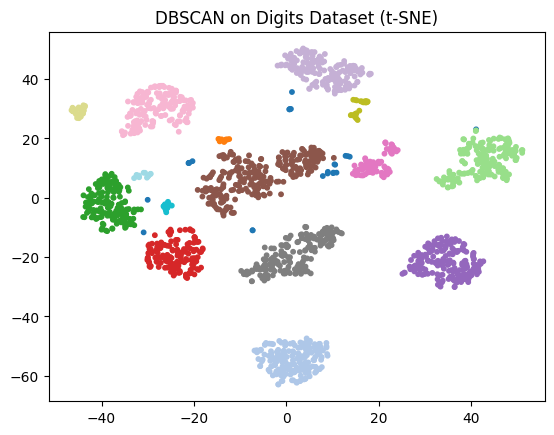

In [13]:
digits = load_digits()
X = TSNE(n_components=2, random_state=42).fit_transform(digits.data)
dbscan = DBSCAN(eps=3, min_samples=10).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap="tab20", s=10)
plt.title("DBSCAN on Digits Dataset (t-SNE)")
plt.show()

Q.33 Generate synthetic data using make_blobs & apply Agglomerative Clustering with complete linkage. Plot the result.

→

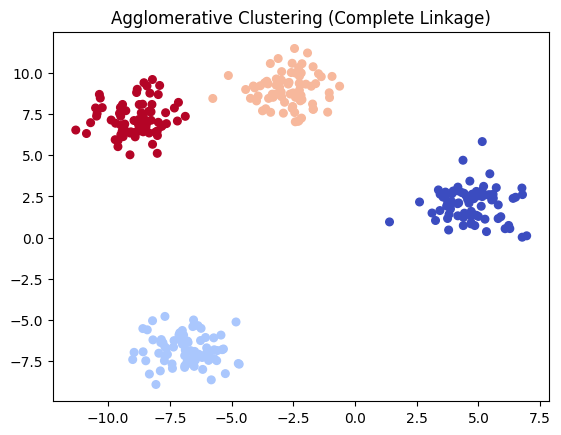

In [14]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage="complete")
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="coolwarm", s=30)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()

Q.34 Load the Breast Cancer dataset & compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.

→

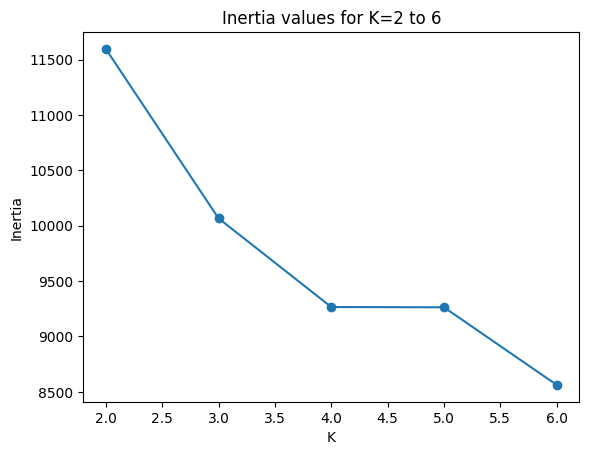

In [15]:
cancer = load_breast_cancer()
X = StandardScaler().fit_transform(cancer.data)
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia, marker="o")
plt.title("Inertia values for K=2 to 6")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

Q.35 Generate synthetic concentric circles using make_circles & cluster using Agglomerative Clustering with single linkage.

→

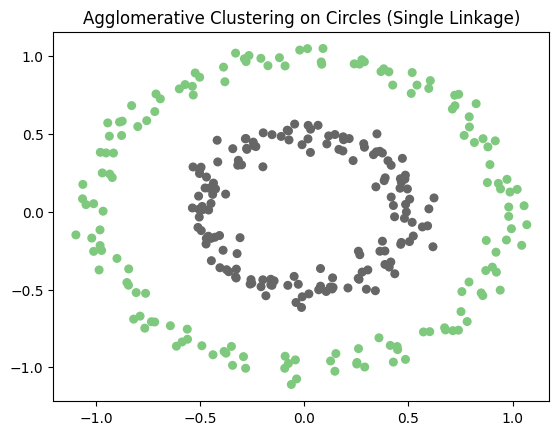

In [16]:
X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
agg = AgglomerativeClustering(n_clusters=2, linkage="single")
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="Accent", s=30)
plt.title("Agglomerative Clustering on Circles (Single Linkage)")
plt.show()

Q.36 Use the Wine dataset, apply DBSCAN after scaling the data & count the number of clusters (excluding noise).

→

In [17]:
wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
dbscan = DBSCAN(eps=2, min_samples=5).fit(X)

n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 5


Q.37 Generate synthetic data with make_blobs & apply KMeans. Then plot the cluster centers on top of the data points.

→

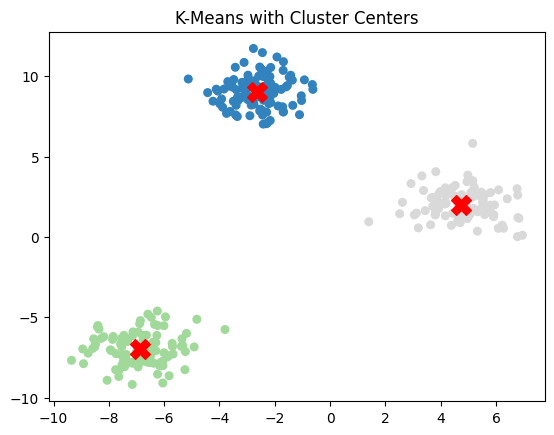

In [18]:
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="tab20c", s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red", marker="X", s=200)
plt.title("K-Means with Cluster Centers")
plt.show()

Q.38 Load the Iris dataset, cluster with DBSCAN & print how many samples were identified as noise.

→

In [19]:
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
dbscan = DBSCAN(eps=0.6, min_samples=5).fit(X)

print("Noise samples:", list(dbscan.labels_).count(-1))

Noise samples: 26


Q.39 Generate synthetic non-linearly separable data using make_moons, apply K-Means & visualize the clustering result.

→

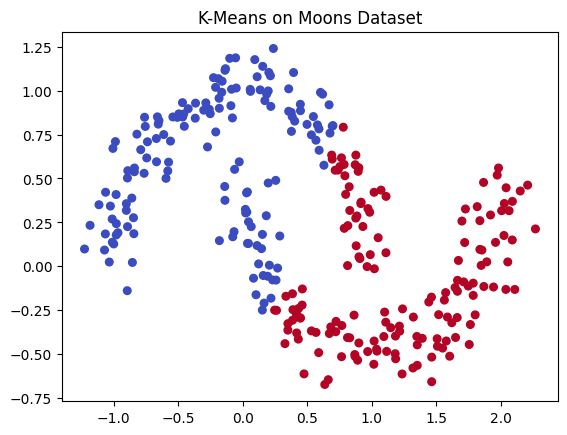

In [20]:
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="coolwarm", s=30)
plt.title("K-Means on Moons Dataset")
plt.show()

Q.40 Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans & visualize with a 3D scatter plot.

→

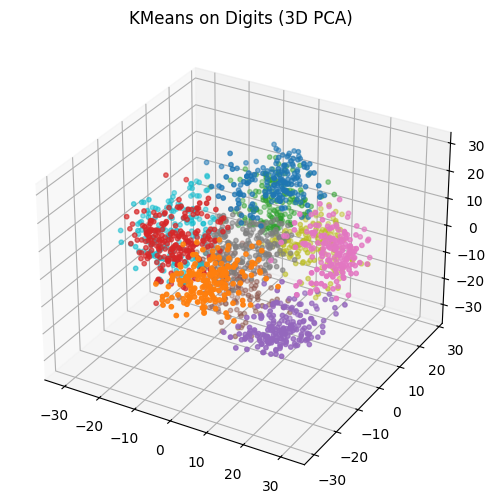

In [21]:
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = PCA(n_components=3).fit_transform(digits.data)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_, cmap="tab10", s=10)
ax.set_title("KMeans on Digits (3D PCA)")
plt.show()

Q.41 Generate synthetic blobs with 5 centers & apply KMeans. Then use silhouette_score to evaluate the clustering.

→

In [22]:
X, _ = make_blobs(n_samples=500, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)

score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.678738720085253


Q.42 Load the Breast Cancer dataset, reduce dimensionality using PCA & apply Agglomerative Clustering. Visualize in 2D.

→

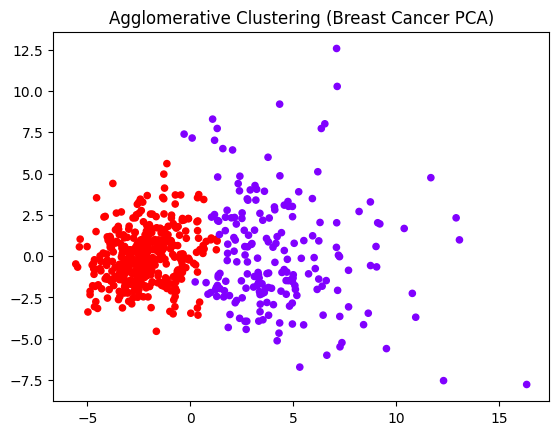

In [23]:
cancer = load_breast_cancer()
X = StandardScaler().fit_transform(cancer.data)
X_pca = PCA(2).fit_transform(X)
agg = AgglomerativeClustering(n_clusters=2).fit(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg.labels_, cmap="rainbow", s=20)
plt.title("Agglomerative Clustering (Breast Cancer PCA)")
plt.show()

Q.43 Generate noisy circular data using make_circles & visualize clustering results from KMeans & DBSCAN side-by-side.

→

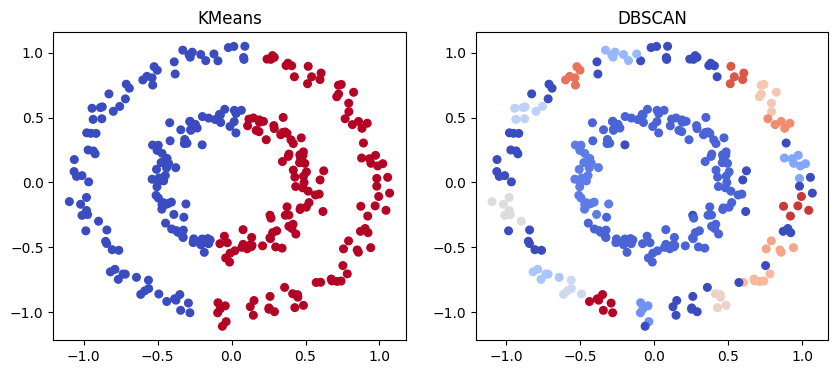

In [24]:
X, y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap="coolwarm", s=30)
plt.title("KMeans")

plt.subplot(1, 2, 2)
dbscan = DBSCAN(eps=0.1, min_samples=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap="coolwarm", s=30)
plt.title("DBSCAN")
plt.show()

Q.44 Load the Iris dataset & plot the Silhouette Coefficient for each sample after KMeans clustering.

→

In [25]:
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
silhouette_vals = silhouette_score(X, kmeans.labels_)

print("Average Silhouette Score:", silhouette_vals)

Average Silhouette Score: 0.4798814508199817


Q.45 Generate synthetic data using make_blobs & apply Agglomerative Clustering with 'average' linkage. Visualize clusters.

→

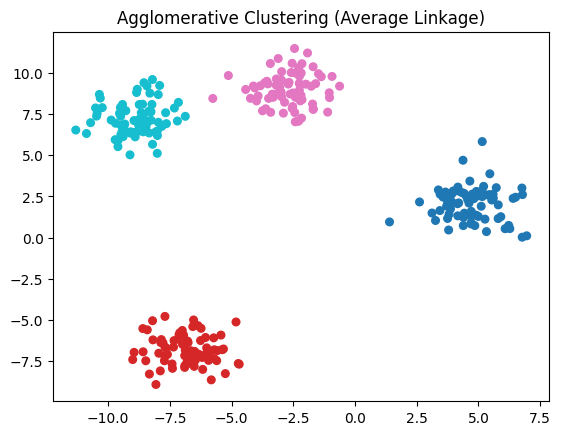

In [26]:
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage="average")
labels = agg.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="tab10", s=30)
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()

Q.46 Load the Wine dataset, apply KMeans & visualize the cluster assignments in a seaborn pairplot (first 4 features).

→

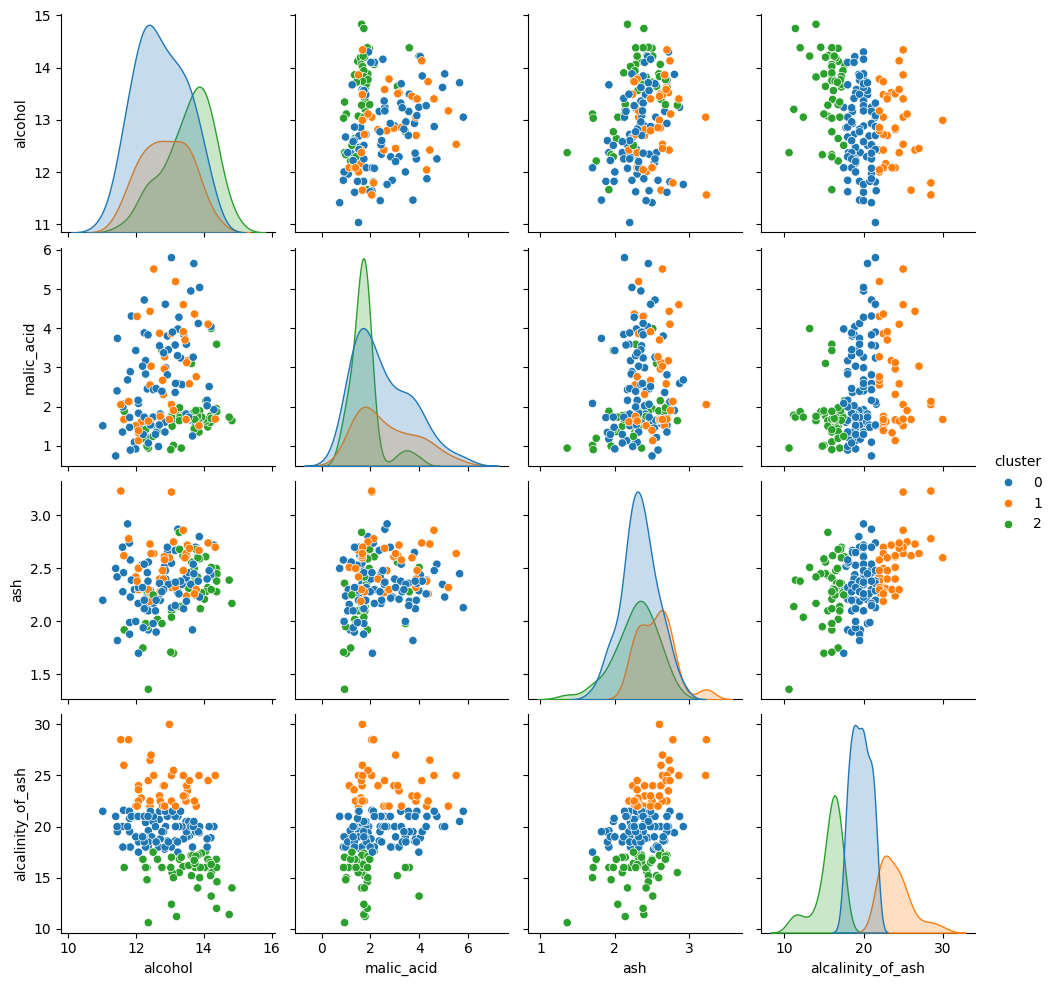

In [28]:
import pandas as pd
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
kmeans = KMeans(n_clusters=3, random_state=42).fit(df.iloc[:, :4])  # first 4 features
df['cluster'] = kmeans.labels_

sns.pairplot(df.iloc[:, [0, 1, 2, 3, -1]], hue="cluster", palette="tab10") # Include the cluster column
plt.show()

Q.47 Generate noisy blobs using make_blobs & use DBSCAN to identify both clusters & noise points. Print the count.

→

In [29]:
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.5, random_state=42)
dbscan = DBSCAN(eps=0.8, min_samples=10).fit(X)

labels = dbscan.labels_
print("Clusters found:", len(set(labels)) - (1 if -1 in labels else 0))
print("Noise points:", list(labels).count(-1))

Clusters found: 3
Noise points: 107


Q.48 Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering & plot the clusters.

→

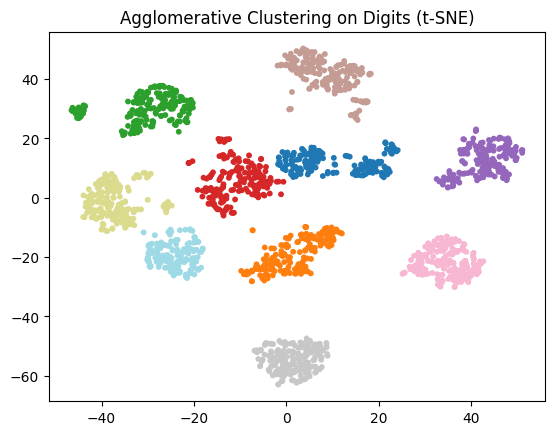

In [30]:
digits = load_digits()
X = TSNE(n_components=2, random_state=42).fit_transform(digits.data)
agg = AgglomerativeClustering(n_clusters=10).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=agg.labels_, cmap="tab20", s=10)
plt.title("Agglomerative Clustering on Digits (t-SNE)")
plt.show()